In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [5]:
df['Total_Spend']=df['TV']+ df['radio']+df['newspaper']

In [6]:
df.head()

,TV,radio,newspaper,sales,Total_Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_Spend', ylabel='sales'>

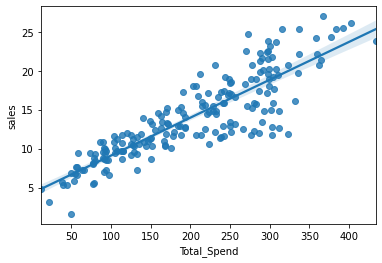

In [7]:
sns.regplot(data=df, x='Total_Spend', y='sales')

In [8]:
X=df['Total_Spend']

In [9]:
y=df['sales']

In [11]:
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [ ]:
#y=mx +b

In [12]:
spend=np.linspace(0,500,11)

In [13]:
spend

array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [14]:
pred= 0.04868788*spend + 4.24302822

In [15]:
pred

array([ 4.24302822,  6.67742222,  9.11181622, 11.54621022, 13.98060422,
       16.41499822, 18.84939222, 21.28378622, 23.71818022, 26.15257422,
       28.58696822])

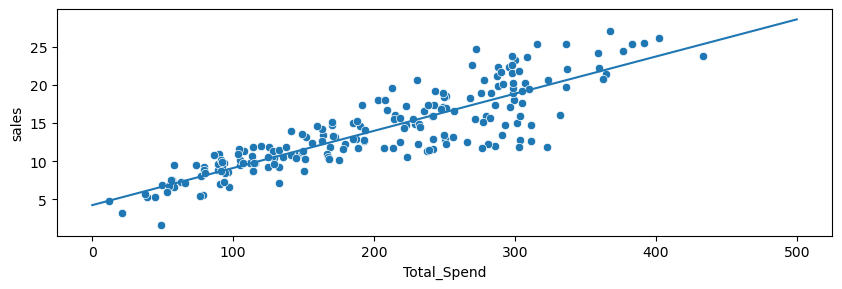

In [21]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(spend,pred)
sns.scatterplot(data=df,x='Total_Spend', y='sales');

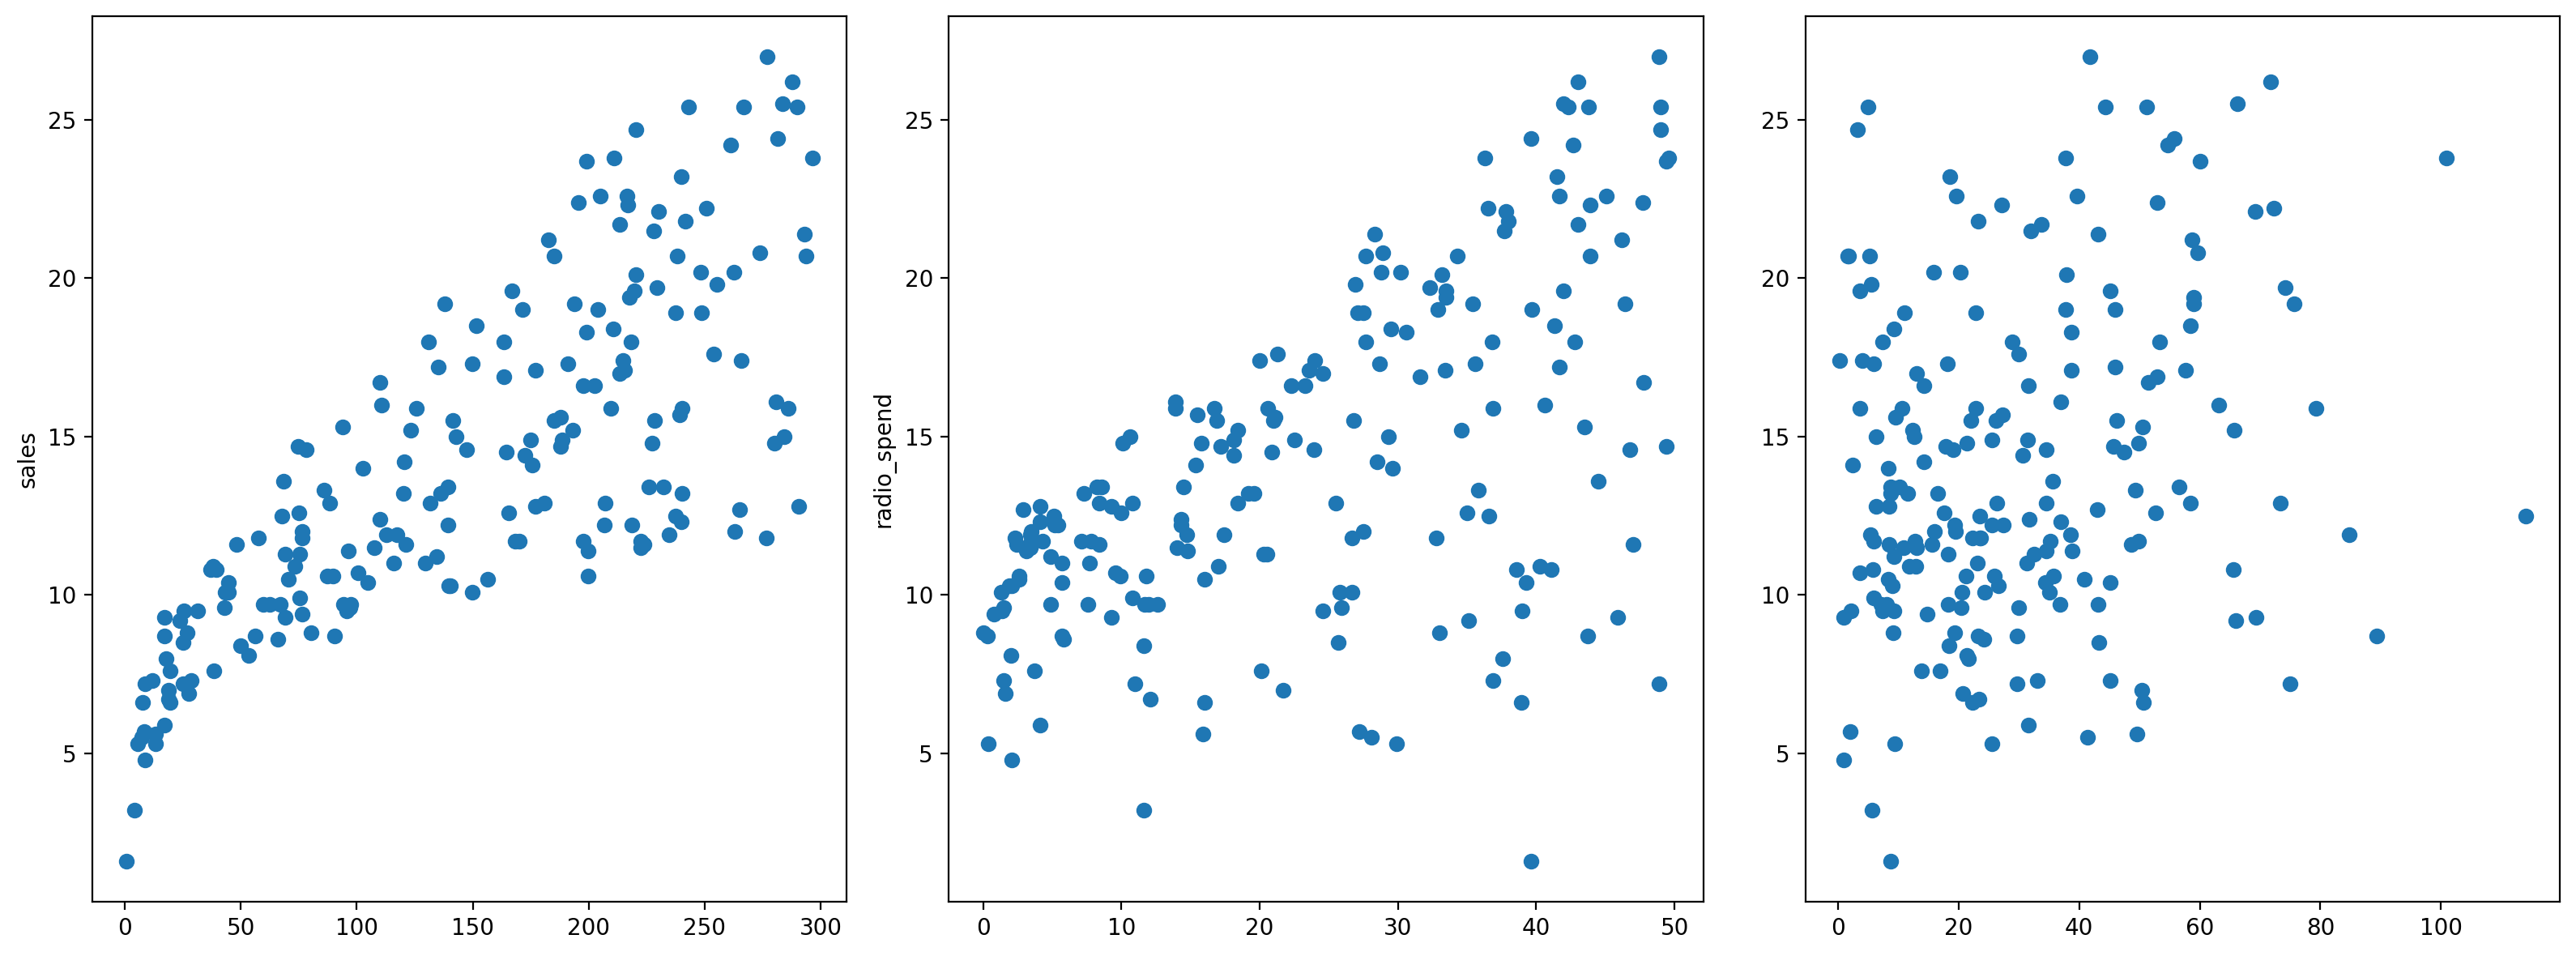

In [54]:
fig, axes=plt.subplots(1,3, figsize=(16,6), dpi=200)

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('sales')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('radio_spend')



axes[2].plot(df['newspaper'],df['sales'],'o')





plt.tight_layout()

In [47]:
df.head()

,TV,radio,newspaper,sales,Total_Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [48]:
X=df.drop(['sales','Total_Spend'], axis=1)

In [50]:
#X

In [51]:
y=df['sales']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
#help(LinearRegression)

In [58]:
model=LinearRegression()

In [59]:
model.fit(X_train,y_train)

LinearRegression()

In [83]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [61]:
test_pred=model.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
mean_absolute_error(y_test,test_pred)

1.2137457736144808

In [65]:
np.sqrt(mean_squared_error(y_test,test_pred))

1.516151937599388

In [67]:
test_residual=y_test-test_pred

In [68]:
test_residual

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

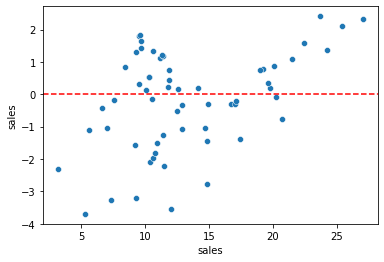

In [79]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='red', ls='--')

In [80]:
 final_model=LinearRegression()

In [81]:
final_model.fit(X,y)

LinearRegression()

In [82]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [88]:
pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [89]:
y_hat=final_model.predict(X)

In [91]:
y_hat[:10]

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872])

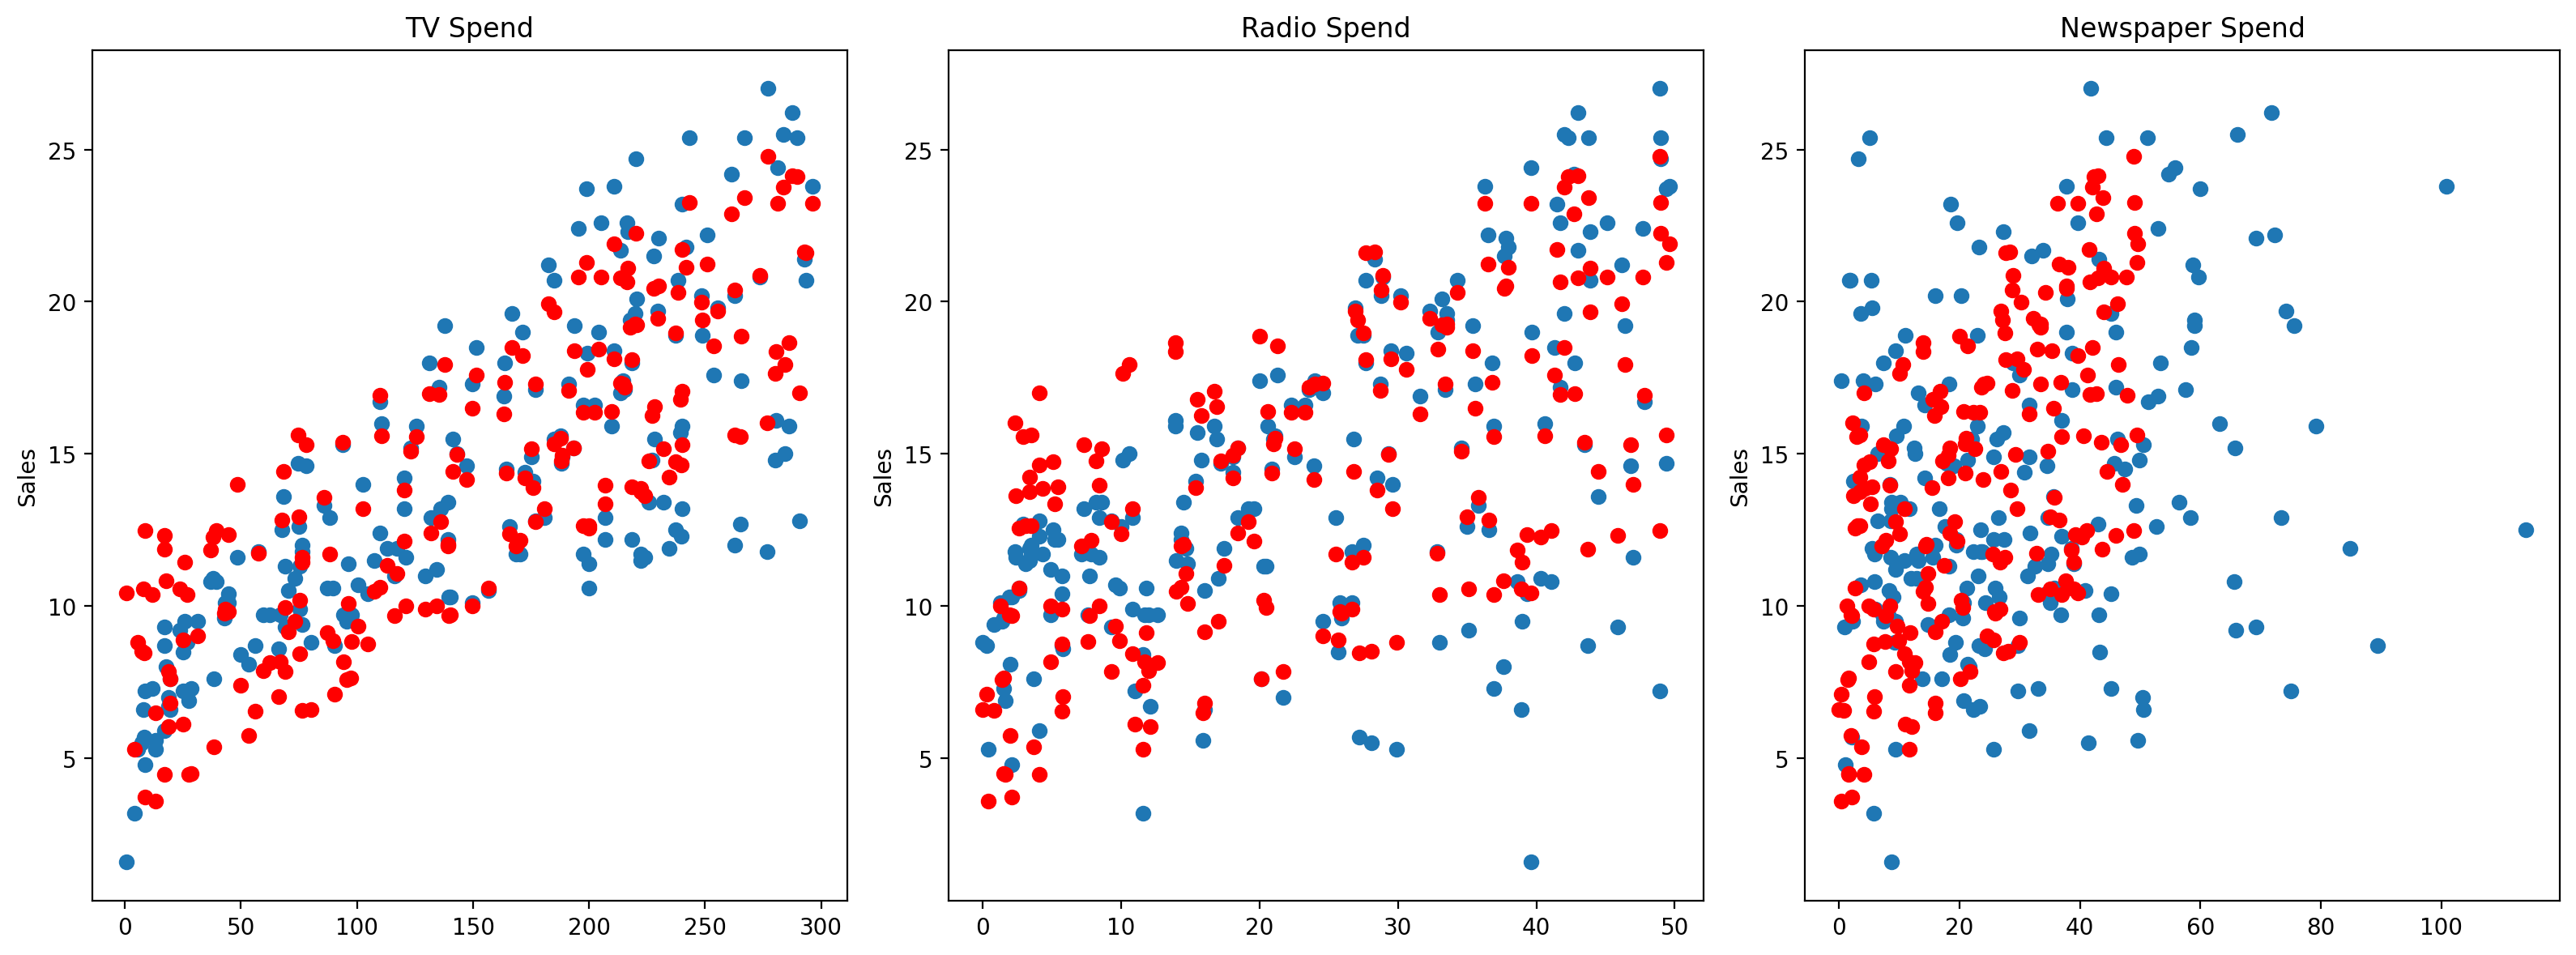

In [93]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6), dpi=200)

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [94]:
from joblib import dump, load

In [95]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [96]:
loaded_model=load('final_sales_model.joblib')

In [98]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [100]:
campaign=[[149,22,12]]

In [102]:
loaded_model.predict(campaign)

array([13.893032])